In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#導入data並輸出data知道有882rows×11 columns
data = pd.read_csv('/Users/chenyaoxuan/Desktop/taipeiMRT/finalCode/final_data.csv')
data

,Unnamed: 0,觀測時間(day),氣溫(℃),露點溫度(℃),相對溼度(%),風速(m/s),降水量(mm),日最高紫外線指數,日客流量,0:工作日 1:假日,新增確診人數
0,0,2020-01-01,16.0,13.5,85.0,3.9,0.0,2.0,1768450.0,1.0,0
1,1,2020-01-02,19.9,13.9,70.0,3.8,0.0,5.0,2375895.0,0.0,0
2,2,2020-01-03,21.0,13.8,65.0,3.1,0.0,5.0,2559124.0,0.0,0
3,3,2020-01-04,21.1,14.5,68.0,2.6,0.0,5.0,2130903.0,1.0,0
4,4,2020-01-05,22.1,16.2,71.0,3.7,0.0,6.0,1770021.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
877,877,2022-05-27,22.5,21.7,96.0,1.9,45.0,5.0,1277760.0,0.0,7081
878,878,2022-05-28,25.5,24.1,92.0,0.7,0.5,8.0,888888.0,1.0,6395
879,879,2022-05-29,28.6,23.8,77.0,1.4,0.0,12.0,759145.0,1.0,4934
880,880,2022-05-30,29.1,24.4,77.0,1.8,0.0,9.0,1209812.0,0.0,5730


In [3]:
#整理不需要的欄位，並用info()看是否有空值和型態
del data['Unnamed: 0'] 
data= data.rename(columns={'觀測時間(day)': 'datetime'})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    882 non-null    object 
 1   氣溫(℃)       882 non-null    float64
 2   露點溫度(℃)     882 non-null    float64
 3   相對溼度(%)     882 non-null    float64
 4   風速(m/s)     882 non-null    float64
 5   降水量(mm)     882 non-null    float64
 6   日最高紫外線指數    882 non-null    float64
 7   日客流量        882 non-null    float64
 8   0:工作日 1:假日  882 non-null    float64
 9   新增確診人數      882 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 69.0+ KB


In [4]:
data.describe(include='all')  

#統計值變量說明：
#count：數量統計，此列共有多少有效值
#unipue：不同的值有多少個
#top:出現最多的類型
#freq:出現次數
#mean：均值
#std：標準差
#min：最小值
#25%：四分之一分位數
#50%：二分之一分位數
#75%：四分之三分位數
#max：最大值

,datetime,氣溫(℃),露點溫度(℃),相對溼度(%),風速(m/s),降水量(mm),日最高紫外線指數,日客流量,0:工作日 1:假日,新增確診人數
count,882,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,8.820000e+02,882.000000,882.000000
unique,882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,23.493311,18.674376,76.102041,2.235601,5.429932,6.303855,1.646977e+06,0.319728,306.015873
std,NaN,5.410667,4.825420,10.452249,0.879610,15.437034,3.155552,5.439731e+05,0.466636,1504.415115
min,NaN,8.200000,1.900000,47.000000,0.700000,0.000000,0.000000,1.499360e+05,0.000000,0.000000
25%,NaN,19.000000,15.300000,68.000000,1.500000,0.000000,3.000000,1.324034e+06,0.000000,0.000000
50%,NaN,23.350000,18.950000,76.000000,2.100000,0.100000,7.000000,1.812892e+06,0.000000,0.000000
75%,NaN,28.600000,23.100000,85.000000,2.900000,2.500000,9.000000,2.067138e+06,1.000000,1.000000


In [5]:
#解決mac中文字體問題
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
# Matplotlib中字體問題，解决Matplotlib中文问题
#plt.rcParams['axes.unicode_minus'] = False    
# 解决Matplotlib坐标轴负号'-'显示为方块的问题
sns.set(font='Arial Unicode MS')

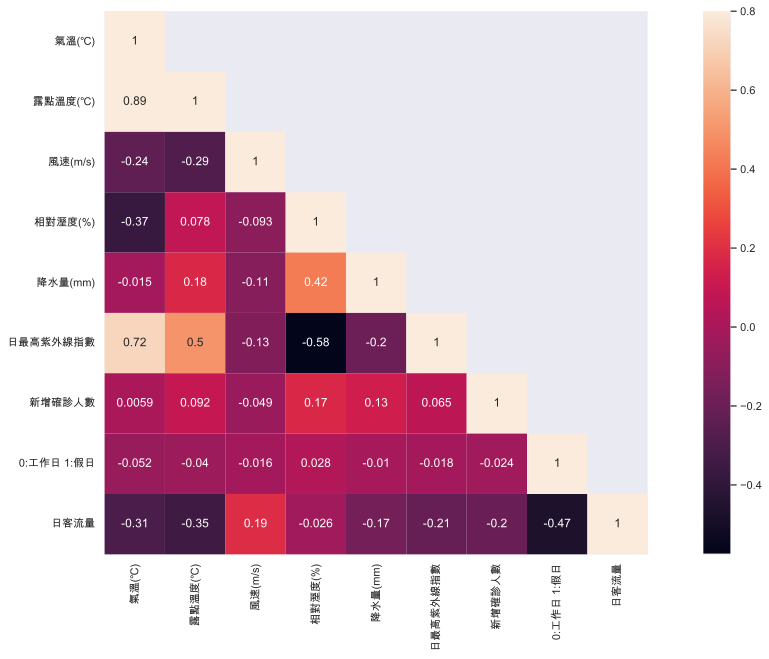

In [6]:
#用heatmap看相關性分析，可知除相對濕度，都對日客流量都有正負0.1以上的影響
data_heatmap = data[["氣溫(℃)","露點溫度(℃)",'風速(m/s)',"相對溼度(%)","降水量(mm)","日最高紫外線指數","新增確診人數","0:工作日 1:假日","日客流量"]].corr()
mask = np.array(data_heatmap)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(data_heatmap, mask=mask,vmax=.8, square=True,annot=True)
plt.savefig("heatmap_2",dpi=300) #存擋圖檔
plt.show()

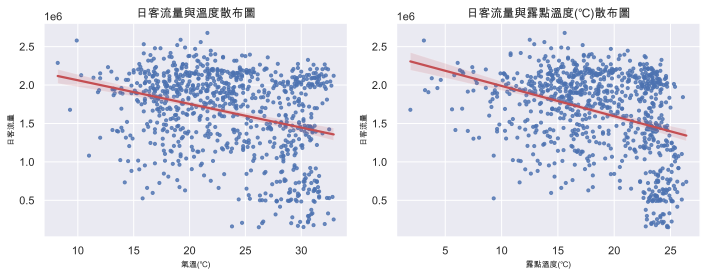

In [7]:
#用散布圖觀察變數與日客流量的分佈
plt.figure(figsize = (10,4))

plt.subplot(1, 2, 1)
sns.regplot(x=data['氣溫(℃)'],y=data['日客流量'],data=data, line_kws={"color":"r"}, scatter_kws={"s": 10})     
plt.xlabel('氣溫(℃)', fontsize=8)
plt.ylabel('日客流量', fontsize=8)
plt.title("日客流量與溫度散布圖")


plt.subplot(1, 2, 2)
sns.regplot(x=data['露點溫度(℃)'],y=data['日客流量'],data=data, line_kws={"color":"r"}, scatter_kws={"s": 10})     
plt.xlabel('露點溫度(℃)', fontsize=8)
plt.ylabel('日客流量', fontsize=8)
plt.title("日客流量與露點溫度(℃)散布圖")

plt.savefig("日客流量與溫度&露點溫度(℃)散布圖",dpi=300) #存圖

plt.tight_layout() #保持間距
plt.show()

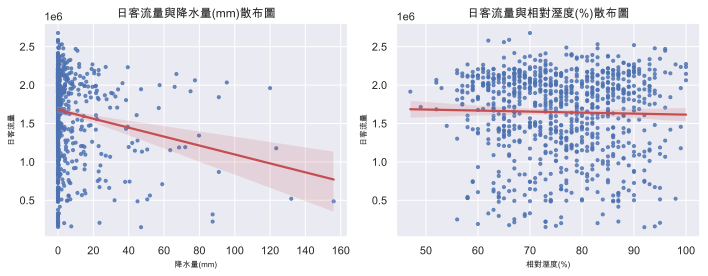

In [8]:
#用散布圖觀察變數與日客流量的分佈
plt.figure(figsize = (10,4))

plt.subplot(1, 2, 1)
sns.regplot(x=data['降水量(mm)'],y=data['日客流量'],data=data, line_kws={"color":"r"}, scatter_kws={"s": 10})     
plt.xlabel('降水量(mm)', fontsize=8)
plt.ylabel('日客流量', fontsize=8)
plt.title("日客流量與降水量(mm)散布圖")

plt.subplot(1, 2, 2)
sns.regplot(x=data['相對溼度(%)'],y=data['日客流量'],data=data, line_kws={"color":"r"}, scatter_kws={"s": 10})     
plt.xlabel('相對溼度(%)', fontsize=8)
plt.ylabel('日客流量', fontsize=8)
plt.title("日客流量與相對溼度(%)散布圖")

plt.savefig("日客流量與降水量(mm)&相對溼度(%)散布圖",dpi=300)
plt.tight_layout() #保持間距
plt.show()

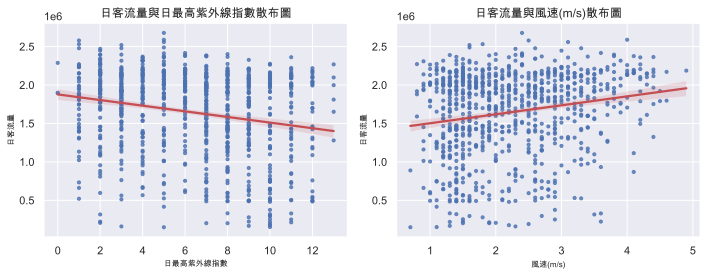

In [9]:
#用散布圖觀察變數與日客流量的分佈
plt.figure(figsize = (10,4))

plt.subplot(1, 2, 1)
sns.regplot(x=data['日最高紫外線指數'],y=data['日客流量'],data=data, line_kws={"color":"r"}, scatter_kws={"s": 10})     
plt.xlabel('日最高紫外線指數', fontsize=8)
plt.ylabel('日客流量', fontsize=8)
plt.title("日客流量與日最高紫外線指數散布圖")

plt.subplot(1, 2, 2)
sns.regplot(x=data['風速(m/s)'],y=data['日客流量'],data=data, line_kws={"color":"r"}, scatter_kws={"s": 10})     
plt.xlabel('風速(m/s)', fontsize=8)
plt.ylabel('日客流量', fontsize=8)
plt.title("日客流量與風速(m/s)散布圖")

plt.savefig("日客流量與日最高紫外線指數＆風速散布圖",dpi=300)
plt.tight_layout() #保持間距
plt.show()

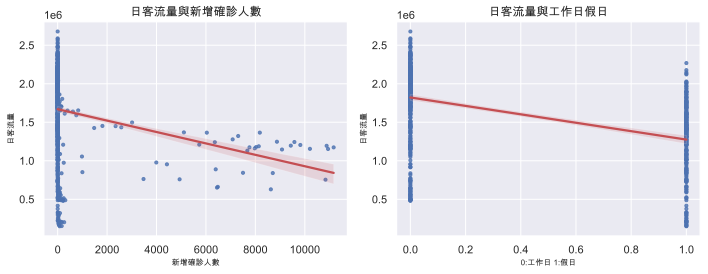

In [10]:
#觀察變數與日客流量的分佈
plt.figure(figsize = (10,4))

plt.subplot(1, 2, 1)
sns.regplot(x=data['新增確診人數'],y=data['日客流量'],data=data, line_kws={"color":"r"}, scatter_kws={"s": 10})     
plt.xlabel('新增確診人數', fontsize=8)
plt.ylabel('日客流量', fontsize=8)
plt.title("日客流量與新增確診人數")

plt.subplot(1, 2, 2)
sns.regplot(x=data['0:工作日 1:假日'],y=data['日客流量'],data=data, line_kws={"color":"r"}, scatter_kws={"s": 10})     
plt.xlabel('0:工作日 1:假日', fontsize=8)
plt.ylabel('日客流量', fontsize=8)
plt.title("日客流量與工作日假日")
plt.savefig("日客流量與工作日假日",dpi=300)

plt.savefig("日客流量與新增確診人數＆工作日假日",dpi=300)
plt.tight_layout() #保持間距
plt.show()

In [11]:
#刪掉不要建模的變數
dropFeatures = ["datetime"]
data = data.drop(dropFeatures,axis=1)
#"氣溫(℃)","露點溫度(℃)",'風速(m/s)',"相對溼度(%)","降水量(mm)","日最高紫外線指數","新增確診人數" 

#改成類別型態
categoryVariableList = ["0:工作日 1:假日"]
for var in categoryVariableList:
    data[var] =data[var].astype("category")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   氣溫(℃)       882 non-null    float64 
 1   露點溫度(℃)     882 non-null    float64 
 2   相對溼度(%)     882 non-null    float64 
 3   風速(m/s)     882 non-null    float64 
 4   降水量(mm)     882 non-null    float64 
 5   日最高紫外線指數    882 non-null    float64 
 6   日客流量        882 non-null    float64 
 7   0:工作日 1:假日  882 non-null    category
 8   新增確診人數      882 non-null    int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 56.2 KB


In [13]:
#分成訓練和測試
y = data['日客流量']
X = data.copy().drop(['日客流量'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 1)

#Build Linear regression model
model = linear_model.LinearRegression(n_jobs=-1)

#作最小最大值標準化 MinMaxScaler
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))

# Explained variance score: 1 is perfect prediction
print('R2 score_L: {}'.format(r2_score(y_test, y_pred)))  

Coefficients: [ 7947666.98717666 -8916031.15145653  4267389.60277615   221223.61965628
  -966045.83691924  -135530.56007256  -572958.10126825  -695665.17713812]

R2 score_L: 0.39190611734412273


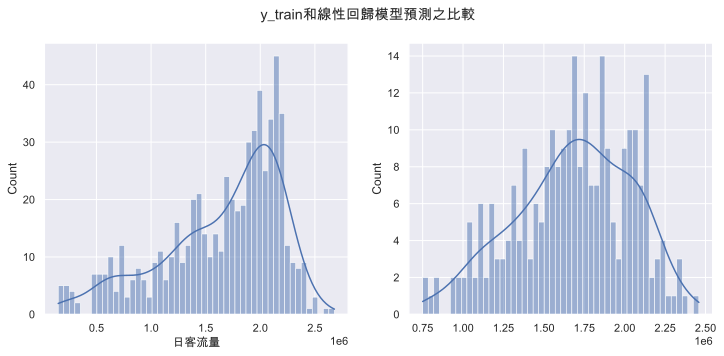

In [14]:
#觀察y_train和用線性模型預測後的分布狀況
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
plt.subplot(1, 2, 1)
sns.histplot(y_train,ax=ax1,bins=50, kde=True)

plt.subplot(1, 2, 2)
sns.histplot(y_pred,ax=ax2,bins=50, kde=True)

plt.suptitle("y_train和線性回歸模型預測之比較")
plt.savefig("y_train和線性回歸模型預測之比較",dpi=300)
plt.show()

In [15]:
#隨機森林模型
from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor(n_estimators=100,random_state =42)


rfModel.fit(X_train,y_train)
preds_rf = rfModel.predict(X_test)

score = rfModel.score(X_test,y_test)

print('score_rf: {}'.format(score))
print('R2 score_rf: {}'.format(r2_score(y_test,preds_rf)))

score_rf: 0.7715172680763066
R2 score_rf: 0.7715172680763066


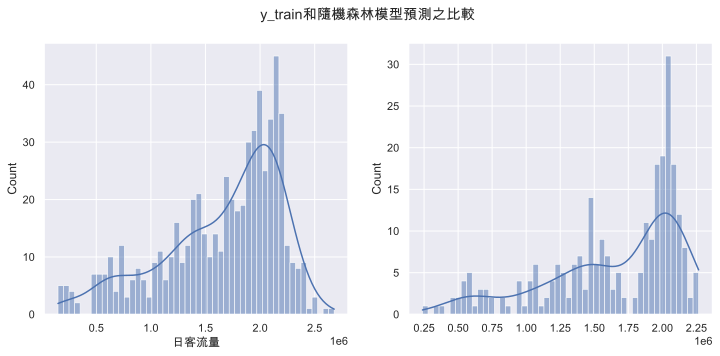

In [16]:
#觀察y_train和用隨機森林模型預測後的分布狀況
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.histplot(y_train,ax=ax1,bins=50, kde=True)
sns.histplot(preds_rf,ax=ax2,bins=50, kde=True)

plt.suptitle("y_train和隨機森林模型預測之比較")
plt.savefig("y_train和隨機森林模型預測之比較",dpi=300)
plt.show()